# Outlier Detection

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
%matplotlib inline
#Create a pandas dataframe of one column

data = {'a':[1,2,3,4,5,6,7,8,9,2,3,4,7,29,2,3,67,8,5,4,8,9,8,1,2,0,-1,-39,3,5,8,9,8,7,5,4,3,2,1,2],
        'b':[3,9,3,4,5,2,3,4,5,6,8,4,5,6,7,8,3,2,3,4,12,7,8,3,2,123,2,3,4,5,6,2,19,1,-10,3,4,5,6,3]}

df = pd.DataFrame(data)

df

,a,b
0,1,3
1,2,9
2,3,3
3,4,4
4,5,5
5,6,2
6,7,3
7,8,4
8,9,5
9,2,6


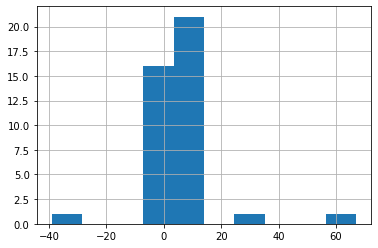

In [2]:
#distribution of column a
df.a.hist()

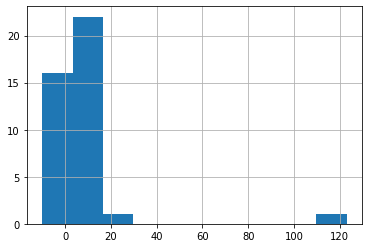

In [3]:
#distribution of column b
df.b.hist()

## Tukey's Method for Univariate Outlier Detection

In [4]:
#find outliers

outliers = []
outliers_list= []

for feature in df.keys():
    #find first percentile value
    Q1 = np.percentile(df[feature],25.)
    
    #find third percentile value
    Q3 = np.percentile(df[feature],75.)

    #calculate outlier step
    step = (Q3-Q1)*1.5

    #find outliers for corresponding feature
    outlier_feature = df[~((df[feature] >= Q1 - step)&(df[feature] <= Q3 + step))]
    display(outlier_feature)
    
    #record outliers' index
    outliers +=outlier_feature.index.tolist()
    
    #record outliers
    outliers_list.append(list(outlier_feature.index))

,a,b
13,29,6
16,67,3
27,-39,3


,a,b
20,8,12
25,0,123
32,8,19
34,5,-10


In [5]:
# Remove the outliers, if any were specified
df = df.drop(df.index[outliers]).reset_index(drop = True)
df

,a,b
0,1,3
1,2,9
2,3,3
3,4,4
4,5,5
5,6,2
6,7,3
7,8,4
8,9,5
9,2,6


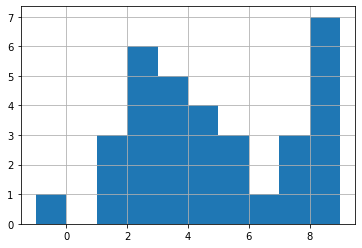

In [6]:
#distribution of column a after dropping outliers
df.a.hist()

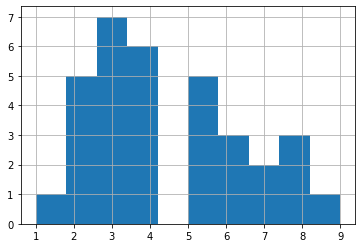

In [7]:
#distribution of column b after dropping outliers
df.b.hist()

## Mahalanobis Distance for Multivariate Outlier Detection

In [8]:
#calculate mahalanobis distance for each row
df = pd.DataFrame(data)
x_minus_mu = df - np.mean(df)
cov = np.cov(df.values.T)
inv_covmat = np.linalg.inv(cov)
left_term = np.dot(x_minus_mu, inv_covmat)
mahal = np.dot(left_term, x_minus_mu.T)
df['mahal'] = mahal.diagonal()
df.head()

,a,b,mahal
0,1,3,0.191638
1,2,9,0.079564
2,3,3,0.102332
3,4,4,0.052385
4,5,5,0.020681


In [9]:
#find outliers

outliers = []
outliers_list= []

for feature in df[['mahal']].keys():
    #find first percentile value
    Q1 = np.percentile(df[feature],25.)
    
    #find third percentile value
    Q3 = np.percentile(df[feature],75.)

    #calculate outlier step
    step = (Q3-Q1)*1.5

    #find outliers for corresponding feature
    outlier_feature = df[~((df[feature] >= Q1 - step)&(df[feature] <= Q3 + step))]
    display(outlier_feature)
    
    #record outliers' index
    outliers +=outlier_feature.index.tolist()
    
    #record outliers
    outliers_list.append(list(outlier_feature.index))

,a,b,mahal
13,29,6,3.215155
16,67,3,22.133267
25,0,123,36.375380
26,-1,2,0.358980
27,-39,3,11.876702
32,8,19,0.406493
34,5,-10,0.850900


In [10]:
# Remove the outliers, if any were specified
df = df.drop(df.index[outliers]).reset_index(drop = True)
df

,a,b,mahal
0,1,3,0.191638
1,2,9,0.079564
2,3,3,0.102332
3,4,4,0.052385
4,5,5,0.020681
5,6,2,0.084223
6,7,3,0.065132
7,8,4,0.064283
8,9,5,0.081677
9,2,6,0.085678
